In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import datetime
import yfinance as yf
import statsmodels
from statsmodels import *
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm

In [75]:
tickers=['BAJFINANCE.BO']

interval = '1d'


period1 = int(time.mktime(datetime.datetime(2012, 4, 18, 23, 59).timetuple()))


period2 = int(time.mktime(datetime.datetime(2022, 4, 18, 23, 59).timetuple()))
xlwriter = pd.ExcelWriter('BAJ.xlsx', engine='openpyxl')
for ticker in tickers:
    query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
    df = pd.read_csv(query_string)
    df.to_excel(xlwriter, sheet_name=ticker, index=False)

xlwriter.save()

In [76]:
df1=pd.read_excel("BAJ.xlsx" , index_col="Date" , parse_dates = True)
df1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-04-18,85.780624,86.557800,85.110313,86.339218,82.256828,4385.0
2012-04-19,85.877769,87.723557,85.877769,86.659798,82.562241,138254.0
2012-04-20,87.213539,87.315544,85.974915,86.528656,82.437302,17787.0
2012-04-23,87.237823,87.708984,84.517715,85.246315,81.215599,36583.0
2012-04-24,86.004059,86.004059,82.089043,82.331909,78.439003,7987.0
...,...,...,...,...,...,...
2022-04-08,7301.000000,7424.500000,7260.000000,7363.549805,7363.549805,47888.0
2022-04-11,7348.000000,7382.950195,7295.049805,7336.500000,7336.500000,16723.0
2022-04-12,7336.649902,7336.649902,7220.600098,7272.250000,7272.250000,25018.0


<AxesSubplot:xlabel='Date'>

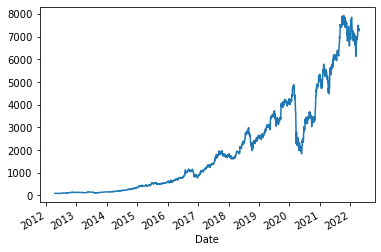

In [77]:
df1.Close.plot()

In [78]:
df1['MA_50'] = df1.Close.rolling(50).mean()
df1['MA_50s'] = df1.Close.rolling(50).std()

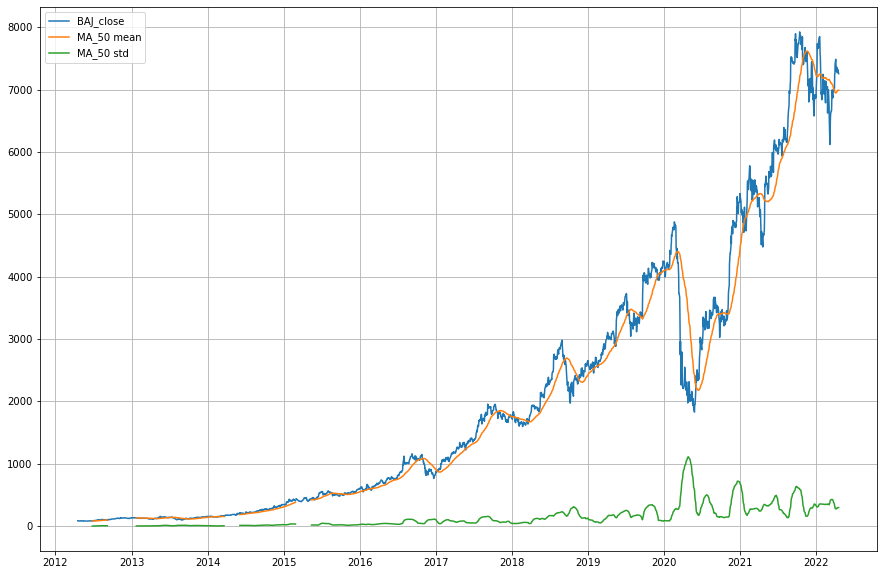

In [79]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df1['Close'], label= 'BAJ_close')
plt.plot(df1['MA_50'], label= 'MA_50 mean')
plt.plot(df1['MA_50s'], label= 'MA_50 std')
plt.legend(loc=2)

In [80]:
df1.dropna(inplace=True)

# applying dickey fuller test to check stationarity

In [81]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df1['Close'], autolag='AIC')
dftest

(0.29927775202461987,
 0.9773113258228157,
 8,
 2218,
 {'1%': -3.4333017061432964,
  '5%': -2.8628439752326242,
  '10%': -2.5674641688260897},
 24968.10407425352)

# PVALUE(0.98) IS > 0.05 then null is accepted which means data is not stationary

In [82]:
df2=df1-df1.shift(1)

In [83]:
df3=np.log(df2)-np.log(df2.shift(1))

In [84]:
df3.dropna(inplace=True)
df4=np.square(df3)
df4

,Open,High,Low,Close,Adj Close,Volume,MA_50,MA_50s
Date,,,,,,,,
2012-06-29,1.939237,1.123975,1.949795,1.832426,1.832458,1.642479,0.058391,0.111585
2012-07-10,2.258061,4.176267,0.000000,1.103166,1.103238,5.752491,0.067610,0.235858
2012-08-09,0.618090,0.036670,0.618090,2.848112,2.848185,2.390580,0.023881,0.617626
2014-08-26,3.786566,4.757167,1.910280,0.845982,0.846016,1.098591,0.012031,0.031164
2014-10-01,0.962026,0.129722,0.962026,0.023940,0.023939,2.080855,0.014123,0.141903
2015-06-18,0.296394,0.345493,0.057598,0.324792,0.324792,0.106124,0.004884,0.440366
2015-06-19,0.280477,0.755643,0.163014,0.420392,0.420390,0.193879,0.029662,0.492489
2015-06-22,1.038967,0.259362,0.666122,0.046862,0.046861,0.392555,0.055904,0.100889
2015-11-24,0.169612,4.182634,0.208548,0.000281,0.000281,2.448325,0.041666,0.016350


In [85]:
from statsmodels.tsa.stattools import adfuller
dftest2 = adfuller(df3['Close'], autolag='AIC')
dftest2

(-5.705740470669106,
 7.495796769968426e-07,
 1,
 28,
 {'1%': -3.6889256286443146,
  '5%': -2.9719894897959187,
  '10%': -2.6252957653061224},
 64.20263912248109)

# p value is less than 0.05, so we reject null hypothesis , hence... data is stationary

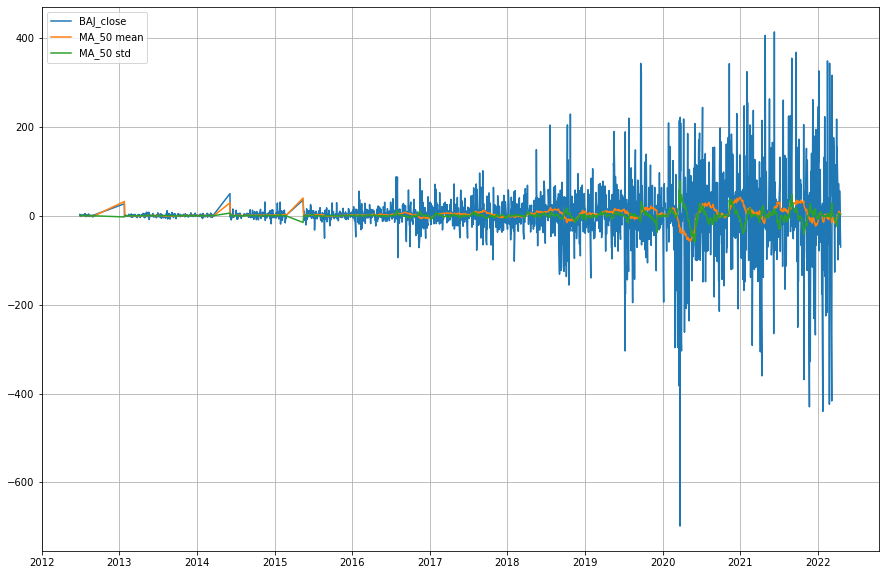

In [86]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df2['Close'], label= 'BAJ_close')
plt.plot(df2['MA_50'], label= 'MA_50 mean')
plt.plot(df2['MA_50s'], label= 'MA_50 std')
plt.legend(loc=2)

In [87]:
def decompose(ts,model="multiplicative"):
  decomposition = seasonal_decompose(ts,freq=1,model = model)

  trend = decomposition.trend
  seasonal = decomposition.seasonal
  residual = decomposition.resid

  plt.figure(figsize=(16,7))
  fig = plt.figure(1)

  plt.subplot(411)
  plt.plot(ts, label='Original')
  plt.legend(loc='best')
  plt.subplot(412)
  plt.plot(trend, label='Trend')
  plt.legend(loc='best')
  plt.subplot(413)
  plt.plot(seasonal,label='Seasonality')
  plt.legend(loc='best')
  plt.subplot(414)
  plt.plot(residual, label='Residuals')
  plt.legend(loc='best')

<ipython-input-87-c0ceaea60298>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(ts,freq=1,model = model)


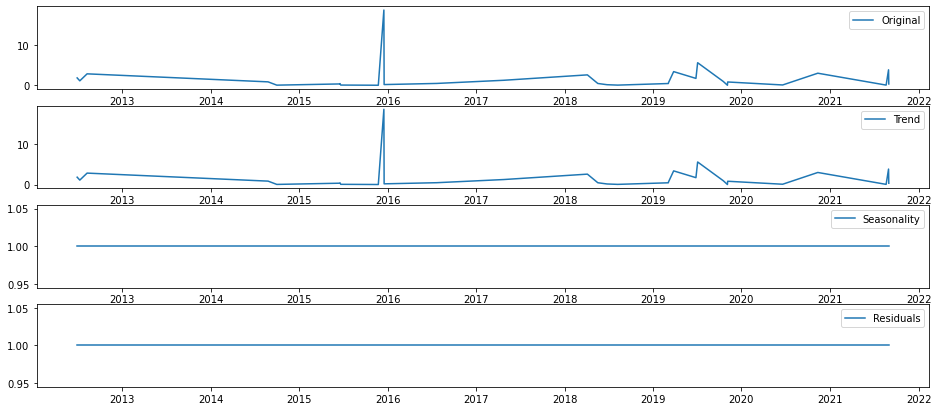

In [88]:
decompose(df4.Close)

<ipython-input-87-c0ceaea60298>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(ts,freq=1,model = model)


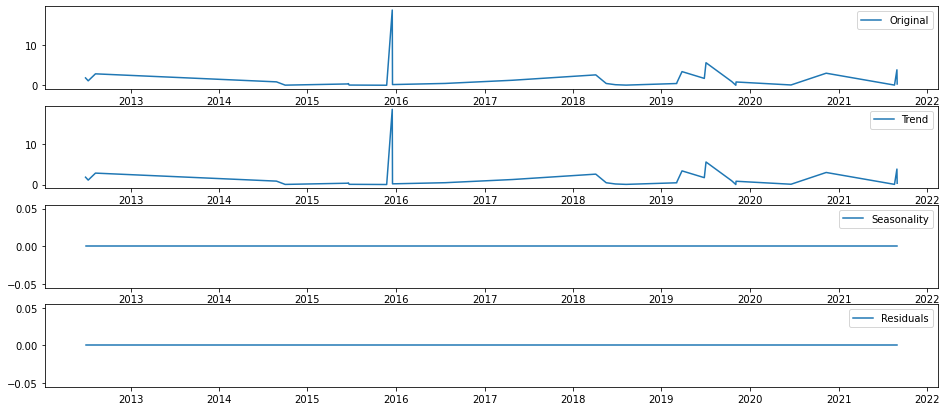

In [89]:
decompose(df4.Close,model="additive")

In [90]:
def graphs(ts):
  df4.dropna()
  lag_acf = acf(df4.Close, nlags=10)
  lag_pacf = pacf(df4.Close, nlags=10)
  fig = plt.figure(figsize=(12,8))
  ax1 = fig.add_subplot(211)
  fig = sm.graphics.tsa.plot_acf(df4.Close,lags=10,ax=ax1)
  ax2 = fig.add_subplot(212)
  fig = sm.graphics.tsa.plot_pacf(df4.Close,lags=10,ax=ax2)

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


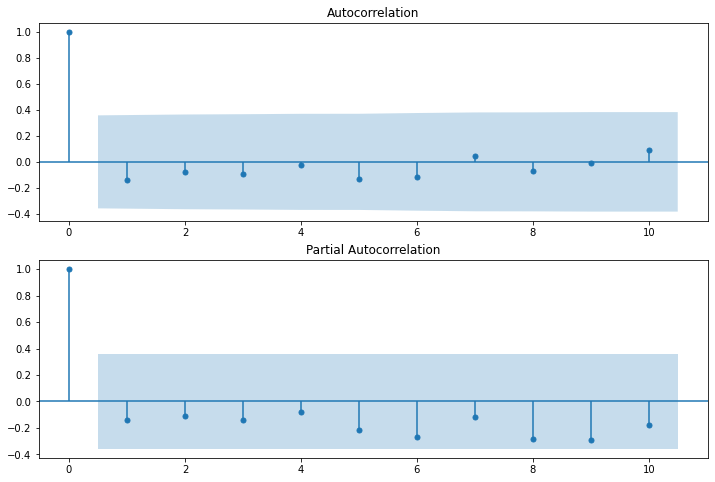

In [91]:
graphs(df4.Close)

# p=0, d=1, q=6

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


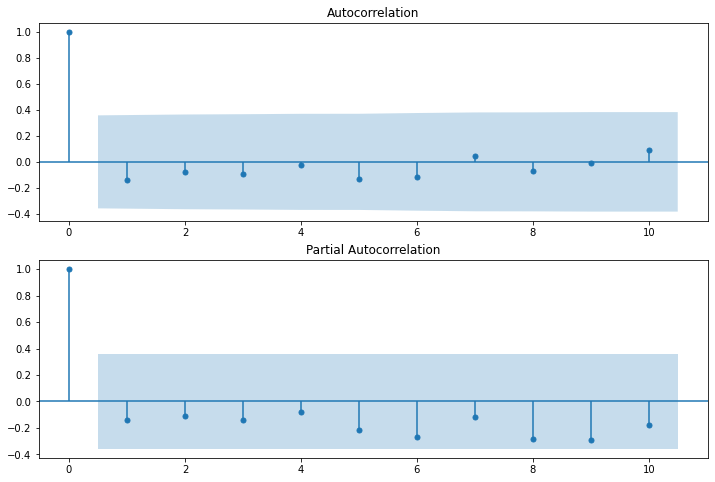

In [92]:
graphs(df3.Close)

# p=0, d=1 , q=6

In [93]:
def arima_eq(ts):
  plt.figure(figsize=(18,8))
  ts= df3.Close
  model = ARIMA(df3.Close, order=(0,1,6))  
  results_ARIMA = model.fit()  
  plt.plot(ts,label="Actual")
  plt.plot(results_ARIMA.fittedvalues, color='red',alpha=0.5,label="Predicted")
  plt.legend()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

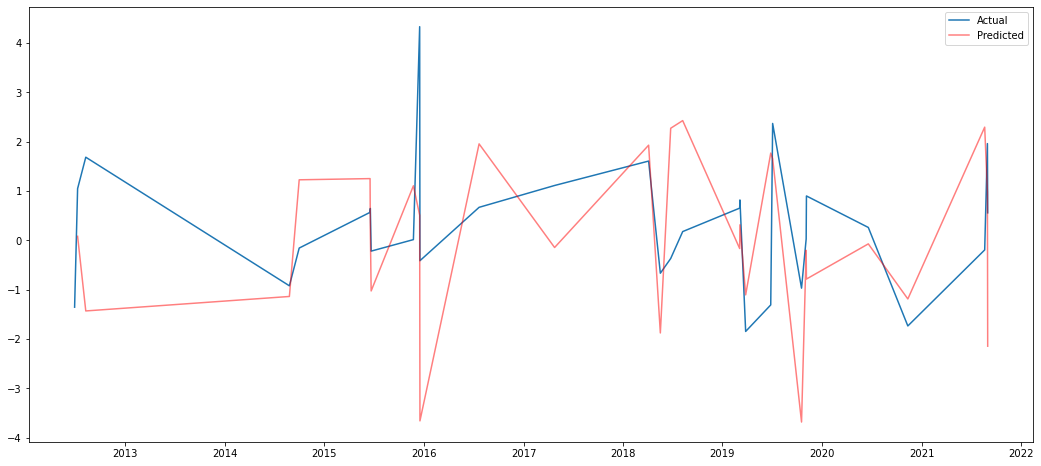

In [94]:
arima_eq(df3.Close)

In [95]:
def predictions(ts,logarithm=False): 
  ts= df3.Close.dropna()
  model = ARIMA(df3.Close, order=(0,1,6))  
  results_ARIMA = model.fit()  
  ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues, copy=True)
  ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()
  
  
  if logarithm==False:
    ARIMA_log_prediction = pd.Series(df3.iloc[0], index=df3.index)
    ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
    plt.plot(ARIMA_log_prediction,label="Prediction")
    plt.plot(df3.Close,label="Original")
    plt.legend()
  else:
    ARIMA_log_prediction = pd.Series(np.log(df3.iloc[0]), index=df3.index)
    ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
    predictions_ARIMA = np.exp(ARIMA_log_prediction)
    plt.plot(predictions_ARIMA,label="Prediction")
    plt.plot(df3.Close,label="Original")
    plt.legend()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


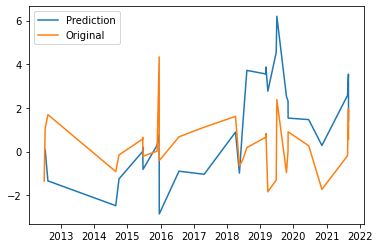

In [96]:
predictions(df3)

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


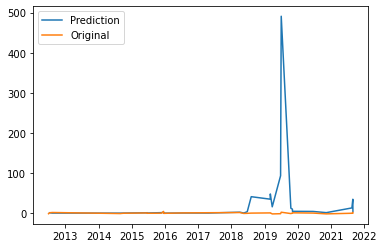

In [97]:
predictions(df3.Close,logarithm=1)

In [98]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, 
                              start_p=3, 
                              start_q=3,
                              max_p=5,
                              max_q=5,
                              test="adf",
                              seasonal=True,
                              trace=True)
    return automodel

In [99]:
arimamodel(df1.Close)

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=25245.228, Time=3.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=25249.891, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25251.390, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=25251.397, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=25252.573, Time=0.02 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=25244.082, Time=2.80 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=25256.548, Time=0.66 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=25252.137, Time=2.01 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=25254.498, Time=1.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=25255.323, Time=0.50 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=25249.889, Time=1.74 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=25244.425, Time=2.46 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=25240.960, Time=3.16 sec
 ARIMA(4,1,4)(0,0,0)[0] intercept   : AIC=25243.111, Time=3.28 sec
 ARIMA(3,1,5)(0,0,0

ARIMA(order=(3, 1, 4), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [100]:
import pandas as pd
import datetime

pd.Timedelta("90 days")

Timedelta('90 days 00:00:00')

In [101]:
df1.Close

Date
2012-06-27      85.013161
2012-06-28      87.796417
2012-06-29      88.515305
2012-07-02      88.345299
2012-07-03      90.885689
                 ...     
2022-04-08    7363.549805
2022-04-11    7336.500000
2022-04-12    7272.250000
2022-04-13    7328.450195
2022-04-18    7257.850098
Name: Close, Length: 2227, dtype: float64

In [102]:
df1.Close.index[-1]-pd.Timedelta("90 days")

Timestamp('2022-01-18 00:00:00')